# Try to Join up Phenology Data to qPCR Data

## John McCallum, Meeghan Pither-Joyce June 2016

- start with Set1 ie no repeats set
- in a sane world, we would have unique sample ids linking phenology and RNA **sigh**

In [3]:
library(data.table)
library(dplyr)
library(lubridate)
library(ggplot2)

In [55]:
BioDT <- fread('./../BiotronPhenology/BioTronPhenologyData.csv')
head(BioDT)

,PhotoP,Vern,Cult,Date,OrganNumber,HaunStage
1,Long,Full,Amarok,2014-05-16,8.875,3.28379
2,Long,Full,Amarok,2014-05-23,13.94444,4.433956
3,Long,Full,Amarok,2014-05-28,19.625,5.444873
4,Long,Full,Amarok,2014-06-03,23.91667,6.564178
5,Long,Full,Amarok,2014-06-10,25.6,8.26862
6,Long,Full,Amarok,2014-07-23,25.91667,9.116667


In [56]:
BioDT[,unique(Cult)]
BioDT[,unique(Vern)]
BioDT[,unique(PhotoP)]

[1] "Amarok"     "Batten Spr" "Batten Win" "CRWT153"    "Otane"     
[6] "Saracen"

[1] "Full" "None"

[1] "Long"  "Short"

In [57]:
options(repr.plot.width = 10, repr.plot.height = 8)

Warning message:
: Removed 11 rows containing missing values (geom_point).

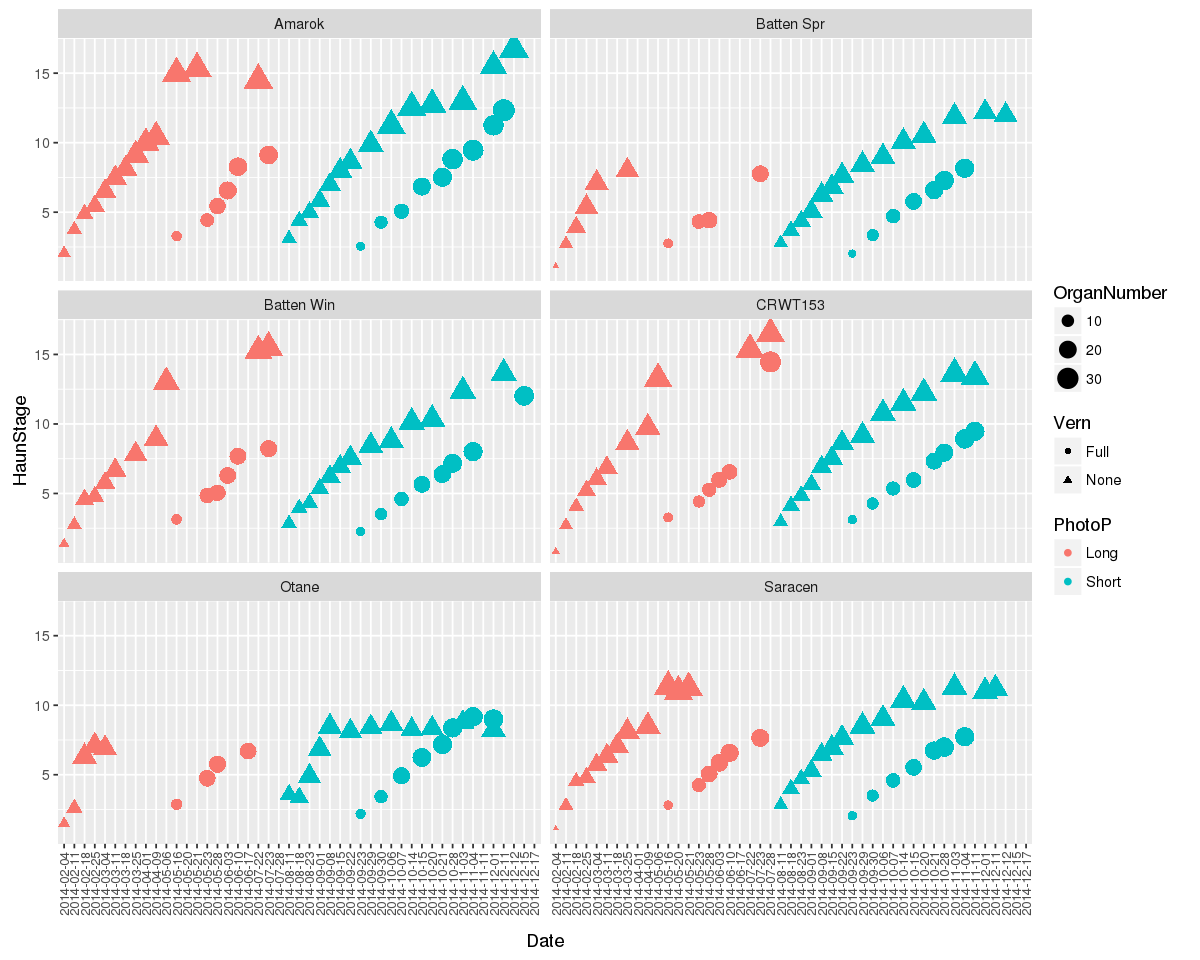

In [58]:
BioDT %>% 
    ggplot(aes(x=Date,y=HaunStage)) + 
    geom_point(aes(size=OrganNumber,shape=Vern,colour=PhotoP)) +
      theme( axis.text.x  = element_text(angle=90, vjust=0.5, size=8)) +
    facet_wrap(~ Cult,ncol=2)

In [59]:
qDT <- fread('./qPCRMean_Set1.csv')
head(qDT)

,Plate,sample_well,Name,EGF1a,Ta54227,VRN1,VRN2,VRN3,VRN1_TA,VRN2_TA,VRN3_TA,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,SampleDate,Vern,Cult,Pp,TaNorm
1,GEP1,A1,AMK105,24.035,24.665,NaN,31.1,NaN,0,0.01155771,0,1,A,3,105,300105,2014-02-04,None,Amarok,16,1.060329
2,GEP1,A10,SCN2,22.195,22.30333,23.665,32.955,30.735,0.3891325,0.0006216255,0.002896112,10,A,3,2,300002,2014-03-04,None,Saracen,16,1.060329
3,GEP1,A11,AMK190,21.865,22.795,NaN,29.58333,NaN,0,0.009047072,0,11,A,3,190,300190,2014-03-04,None,Amarok,16,1.060329
4,GEP1,A12,SCN123,20.905,22.28,28.035,30.475,NaN,0.01851707,0.003412394,0,12,A,3,123,300123,2014-03-11,None,Saracen,16,1.060329
5,GEP1,A2,CRWT262,21.185,22.87,NaN,29.68,NaN,0,0.008912217,0,2,A,3,262,300262,2014-02-04,None,CRWT153,16,1.060329
6,GEP1,A3,SCN326,20.71667,21.435,28.075,28.03,NaN,0.01002676,0.01034444,0,3,A,3,326,300326,2014-02-11,None,Saracen,16,1.060329


In [60]:
qDT[,unique(Cult)]
qDT[,unique(Vern)]
qDT[,unique(Pp)]
qDT[,length(unique(Plot.IDNew))]

[1] "Amarok"     "Saracen"    "CRWT153"    "Otane"      "Batten Spr"
[6] "Batten Win"

[1] "None" "Full"

[1] 16  8

[1] 523

### Check the Date formats

In [61]:
setdiff(qDT$SampleDate,BioDT$Date)

[1] "2014-04-23" "2014-06-24" "2014-07-01" "2014-08-04" "2014-07-25"

In [37]:
BioDT$Date <- as.Date(BioDT$Date)
qDT$SampleDate <- as.Date(qDT$SampleDate)

In [39]:
summary(qDT$SampleDate)
summary(BioDT$Date)

        Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2014-02-04" "2014-05-16" "2014-08-18" "2014-07-20" "2014-10-07" "2014-11-11" 

        Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2014-02-04" "2014-05-20" "2014-09-01" "2014-08-01" "2014-10-15" "2014-12-17" 

### Join by Cult, Date and Vern

In [26]:
dim(qDT)

[1] 565  21

Cant match 99

In [40]:
merge(qDT,BioDT,by.x=c('Cult','SampleDate','Vern'),by.y=c('Cult','Date','Vern')) %>% dim
merge(qDT,BioDT,
      by.x=c('Cult','SampleDate','Vern'),
      by.y=c('Cult','Date','Vern'),
      all.x = TRUE) %>% 
head
mergedDT <- merge(qDT,BioDT,
      by.x=c('Cult','SampleDate','Vern'),
      by.y=c('Cult','Date','Vern'),
      all.x = TRUE) 

[1] 466  24

,Cult,SampleDate,Vern,Plate,sample_well,Name,EGF1a,Ta54227,VRN1,VRN2,VRN3,VRN1_TA,VRN2_TA,VRN3_TA,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,Pp,TaNorm,PhotoP,OrganNumber,HaunStage
1,Amarok,2014-02-04,None,GEP1,A1,AMK105,24.035,24.665,NaN,31.1,NaN,0,0.01155771,0,1,A,3,105,300105,16,1.060329,Long,8.333333,2.066631
2,Amarok,2014-02-04,None,GEP1,C2,AMK306,23.82,23.355,NaN,30.53,NaN,0,0.006920059,0,2,C,3,306,300306,16,1.060329,Long,8.333333,2.066631
3,Amarok,2014-02-04,None,GEP1,G1,AMK157,25.16,24.64667,NaN,30.66,NaN,0,0.01548126,0,1,G,3,157,300157,16,1.060329,Long,8.333333,2.066631
4,Amarok,2014-02-11,None,GEP1,A5,AMK212,22.28,22.89,NaN,29.34,NaN,0,0.01143817,0,5,A,3,212,300212,16,1.060329,Long,10.66667,3.736976
5,Amarok,2014-02-11,None,GEP1,B5,AMK278,21.975,22.34,NaN,28.895,NaN,0,0.01063527,0,5,B,3,278,300278,16,1.060329,Long,10.66667,3.736976
6,Amarok,2014-02-11,None,GEP1,C3,AMK36,21.45,22.365,NaN,28.565,NaN,0,0.01360235,0,3,C,3,36,300036,16,1.060329,Long,10.66667,3.736976


In [41]:
mergedDT[is.na(PhotoP)]

,Cult,SampleDate,Vern,Plate,sample_well,Name,EGF1a,Ta54227,VRN1,VRN2,VRN3,VRN1_TA,VRN2_TA,VRN3_TA,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,Pp,TaNorm,PhotoP,OrganNumber,HaunStage
1,Amarok,2014-04-23,None,GEP2,B9,AMK86,25.355,26.725,NaN,32.16,NaN,0,0.02311543,0,9,B,3,86,300086,16,0.9897611,NA,NA,NA
2,Amarok,2014-04-23,None,GEP2,D9,AMK153,26.17,28.655,NaN,31.45667,NaN,0,0.1434215,0,9,D,3,153,300153,16,0.9897611,NA,NA,NA
3,Amarok,2014-06-17,Full,GEP5,E10,AMK266,22.205,23.415,23.41333,NaN,25.48333,1.001156,0,0.2384348,10,E,3,266,300266,16,0.9770478,NA,NA,NA
4,Amarok,2014-06-17,Full,GEP5,F10,AMK44,24.39,25.33667,25.29667,NaN,26.975,1.028114,0,0.3212274,10,F,3,44,300044,16,0.9770478,NA,NA,NA
5,Amarok,2014-06-17,Full,GEP5,G10,AMK281,24.205,25.335,24.42333,NaN,26.45,1.881218,0,0.4616912,10,G,3,281,300281,16,0.9770478,NA,NA,NA
6,Amarok,2014-08-04,None,GEP6,D3,AMK160,21.75333,22.325,32.965,30.43667,NaN,0.0006266728,0.003615306,0,3,D,4,160,400160,8,1.021726,NA,NA,NA
7,Amarok,2014-08-04,None,GEP6,E3,AMK193,20.09,21.89333,33.56,29.61,NaN,0.0003075979,0.00475392,0,3,E,4,193,400193,8,1.021726,NA,NA,NA
8,Amarok,2014-08-04,None,GEP6,F3,AMK181,22.105,22.63333,NaN,30.05,NaN,0,0.005852762,0,3,F,4,181,400181,8,1.021726,NA,NA,NA
9,Amarok,2014-10-28,None,GEP9,A5,AMK207,25.69,28.19,NaN,31.675,NaN,0,0.08931213,0,5,A,4,207,400207,8,0.9441129,NA,NA,NA
10,Amarok,2014-10-28,None,GEP9,B5,AMK168,24.4,27.135,NaN,NaN,NaN,0,0,0,5,B,4,168,400168,8,0.9441129,NA,NA,NA


## Plot the Somewhat Gappy Data Anyway

Warning message:
: Removed 99 rows containing missing values (geom_point).

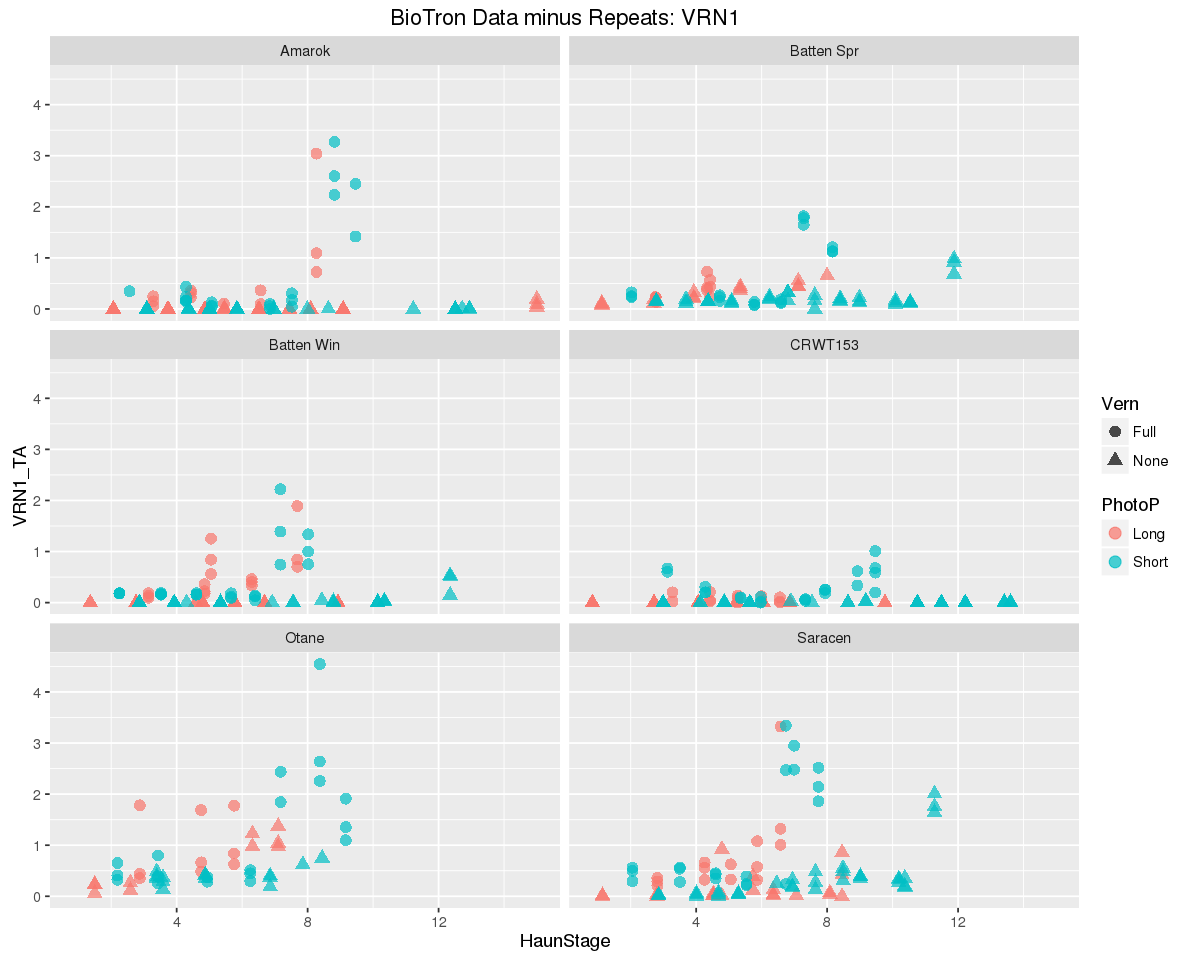

In [50]:
mergedDT %>%
     ggplot(aes(y=VRN1_TA,x=HaunStage)) + 
    geom_point(size=3,alpha=0.7,aes(shape=Vern,colour=PhotoP)) +
    facet_wrap(~ Cult,ncol=2) +
    ggtitle('BioTron Data minus Repeats: VRN1')

Warning message:
: Removed 99 rows containing missing values (geom_point).

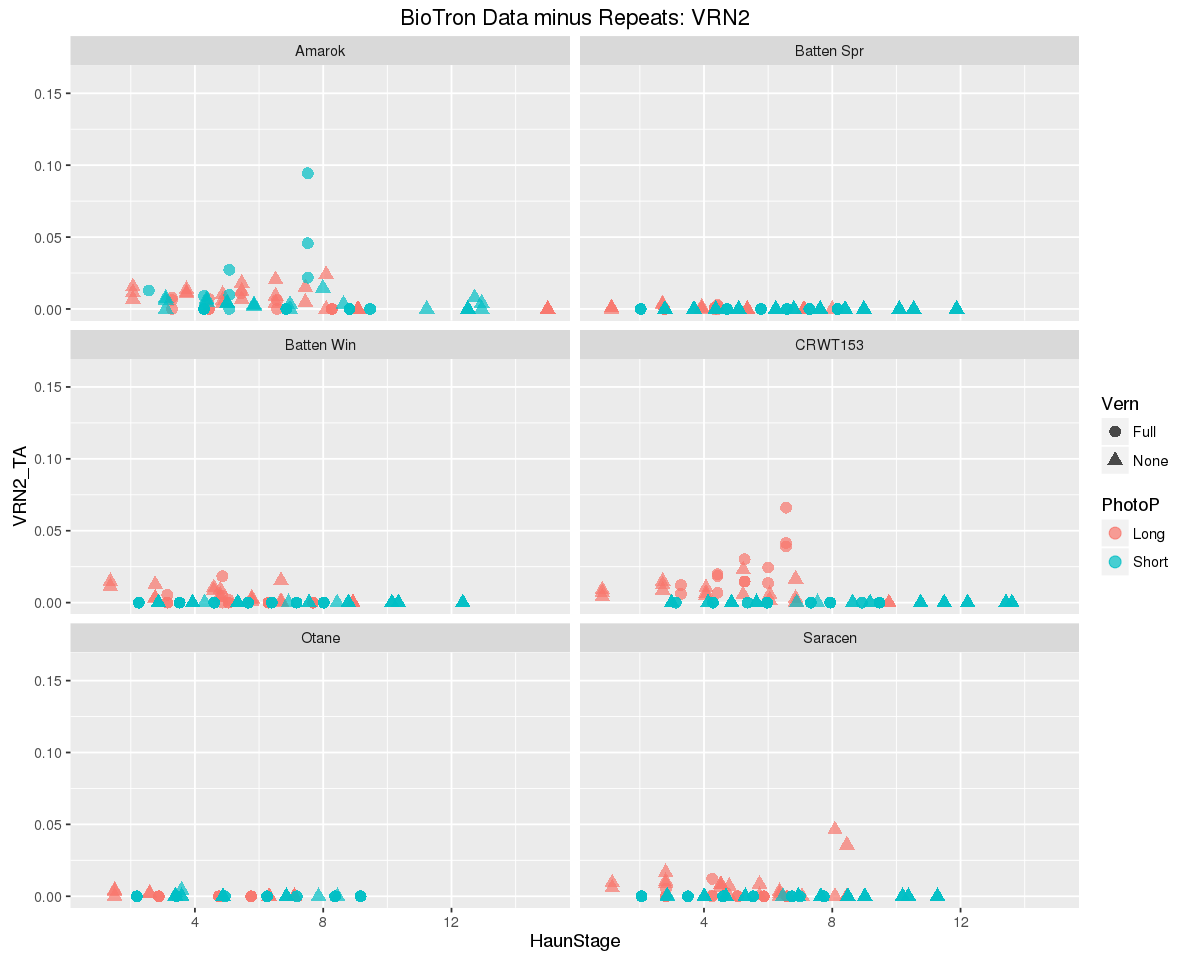

In [51]:
mergedDT %>%
     ggplot(aes(y=VRN2_TA,x=HaunStage)) + 
    geom_point(size=3,alpha=0.7,aes(shape=Vern,colour=PhotoP)) +
    facet_wrap(~ Cult,ncol=2) +
    ggtitle('BioTron Data minus Repeats: VRN2')

Warning message:
: Removed 99 rows containing missing values (geom_point).

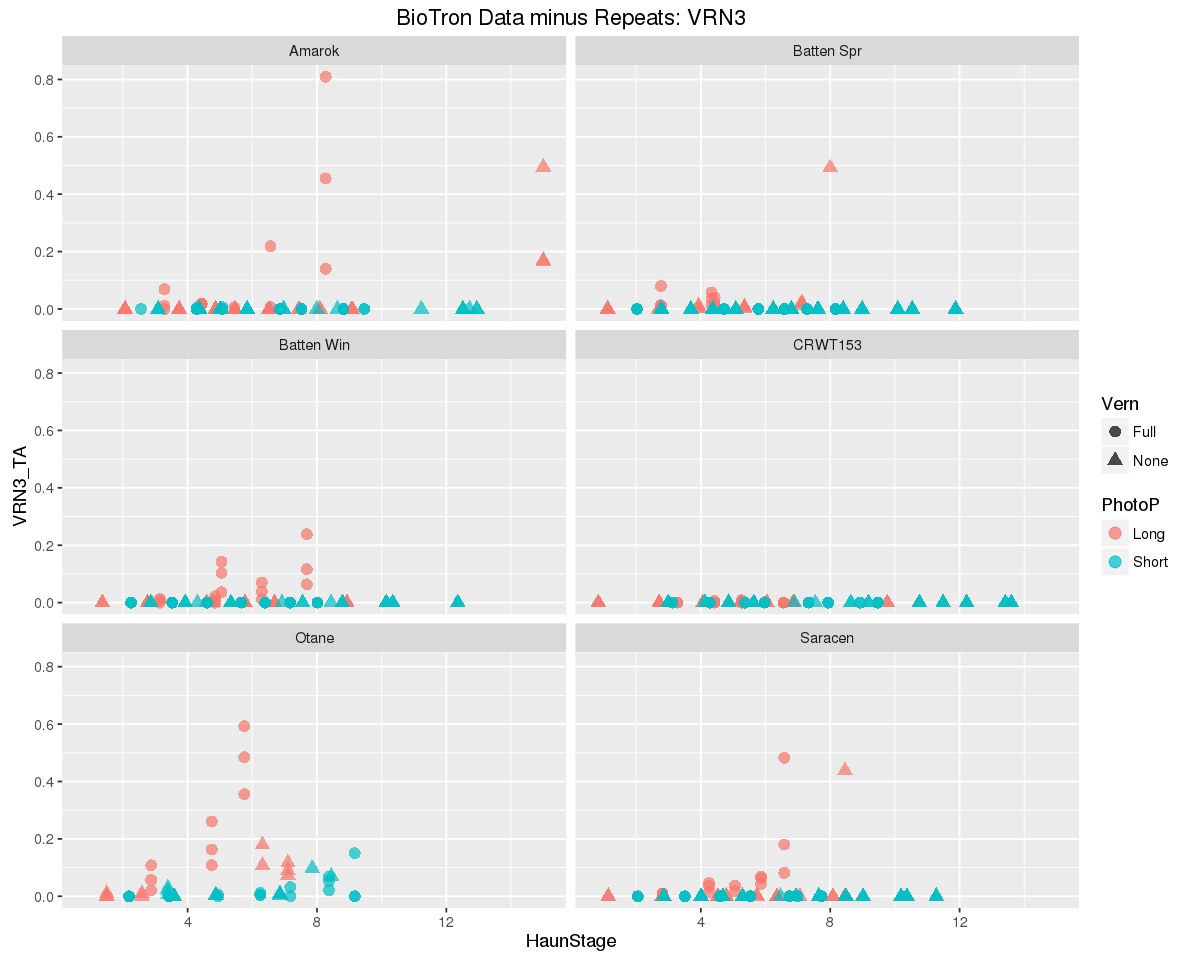

In [52]:
mergedDT %>%
     ggplot(aes(y=VRN3_TA,x=HaunStage)) + 
    geom_point(size=3,alpha=0.7,aes(shape=Vern,colour=PhotoP)) +
    facet_wrap(~ Cult,ncol=2) +
    ggtitle('BioTron Data minus Repeats: VRN3')